In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
import time
import statistics as stats

In [2]:
# Removes warnings for the error messege
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# Make sparse coulms, fix everything
# Scale the data for svm

In [3]:
data = pd.read_csv(r"book_rating_train.csv", index_col = False, delimiter = ',', header=0)
# X_train = X_full_train.iloc[:,:-1]
Y = data["rating_label"]

label_var = 'rating_label'

# Gets the data types, and removes all int data types
data[label_var], ind2label = pd.factorize(data[label_var])
data = data.select_dtypes(include="number")

# normalize numerical variables
for feature in data:
    scaler = StandardScaler()
    scaler.fit(data[feature].values.reshape(-1,1))
    data[feature] = scaler.transform(data[feature].values.reshape(-1,1))

doc2vec_data_source = "book_text_features_doc2vec"
# Maybe replace names of 0, 1, 2 etc with word vector i
# can't do random forrest with float64, need int64
authors_d2v_test = pd.read_csv(f"{doc2vec_data_source}/test_authors_doc2vec20.csv", index_col = False, delimiter = ',', header=None)
authors_d2v_train = pd.read_csv(f"{doc2vec_data_source}/train_authors_doc2vec20.csv", index_col = False, delimiter = ',', header=None)

desc_d2v_test = pd.read_csv(f"{doc2vec_data_source}/test_desc_doc2vec100.csv", index_col = False, delimiter = ',', header=None)
desc_d2v_train = pd.read_csv(f"{doc2vec_data_source}/train_desc_doc2vec100.csv", index_col = False, delimiter = ',', header=None)

name_d2v_test = pd.read_csv(f"{doc2vec_data_source}/test_name_doc2vec100.csv", index_col = False, delimiter = ',', header=None)
name_d2v_train = pd.read_csv(f"{doc2vec_data_source}/train_name_doc2vec100.csv", index_col = False, delimiter = ',', header=None)

In [4]:
X_train = data.iloc[:,:-1]
# Y = X_full_train["rating_label"]

In [5]:
X = pd.concat([X_train, authors_d2v_train, desc_d2v_train, name_d2v_train], axis=1)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [11]:
def SVM(x_train=None, x_test=None, y_train=None, y_test=None, kernel_param="rbf"):
    # Kernals which can be used
    # {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}
    clf = svm.SVC(kernel=kernel_param)
    clf.fit(x_train, y_train)

    predictions = clf.predict(x_test)
    # print(predictions)

    # describe_data = pd.DataFrame(predictions)
    # print(describe_data.describe())
    
    showMetrics(y_test, predictions)
    # print(accuracy)
    
    return clf

In [10]:
# define the plotting function
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns

def showMetrics(y_true, y_pred):
    # print the metrics
    print("Accuracy: {:.3f}".format(accuracy_score(y_true, y_pred)))
    print("Precision: {:.3f}".format(precision_score(y_true, y_pred, average='macro', zero_division=0)))
    print("Recall: {:.3f}".format(recall_score(y_true, y_pred, average='macro')))
    print("F1: {:.3f}".format(f1_score(y_true, y_pred, average='macro')))
    print("Confusion Matrix:")
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.show()

Accuracy: 0.711
Precision: 0.237
Recall: 0.333
F1: 0.277
Confusion Matrix:


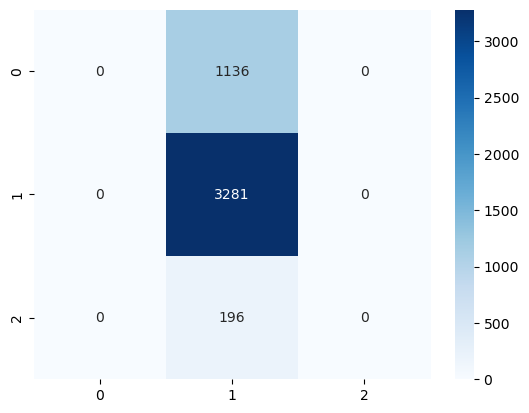

Time taken: 722.271960735321
acc: SVC(kernel='linear')
Accuracy: 0.704
Precision: 0.543
Recall: 0.365
F1: 0.354
Confusion Matrix:


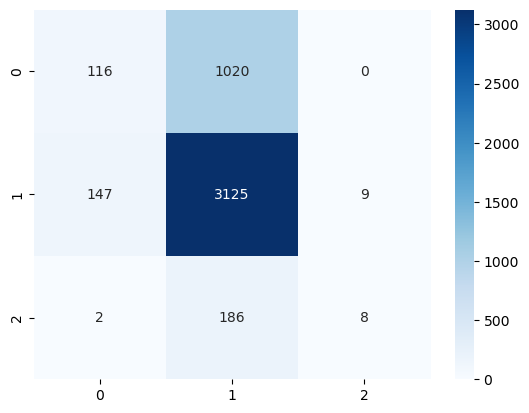

Time taken: 364.52652049064636
acc: SVC(kernel='poly')
Accuracy: 0.714
Precision: 0.741
Recall: 0.347
F1: 0.306
Confusion Matrix:


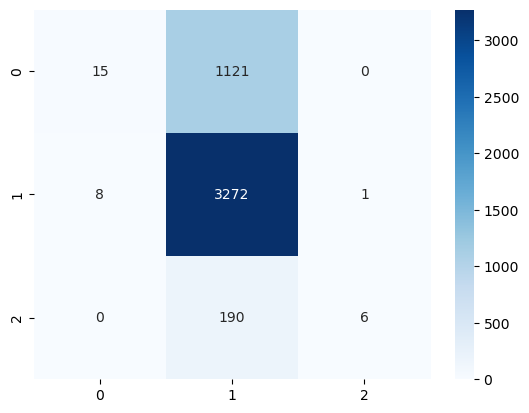

Time taken: 358.17912578582764
acc: SVC()
Accuracy: 0.634
Precision: 0.368
Recall: 0.355
F1: 0.355
Confusion Matrix:


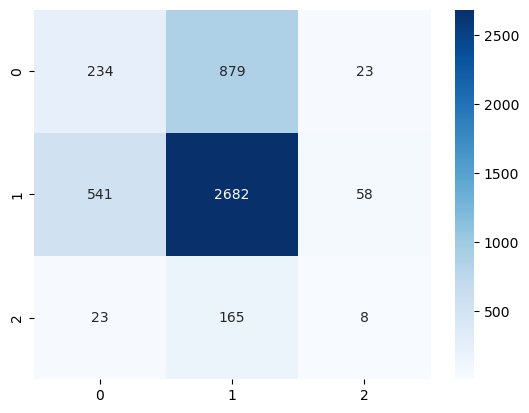

Time taken: 110.21551179885864
acc: SVC(kernel='sigmoid')


In [12]:
# Do not normalise the Y label
# Bad things happen >:((((
kernel_list = ["linear", "poly", "rbf", "sigmoid"]
for kernel in kernel_list:
    # print(f"Kernel: {kernel}")
    start_time = time.time()
    acc = SVM(X_train, X_test, y_train, y_test, kernel_param=kernel)
    end_time = time.time()
    print(f"Time taken: {end_time - start_time}")
    print(f"acc: {acc}")

In [17]:
clf = svm.SVC(kernel="linear")
clf.fit(X_train, y_train,)

predictions = clf.predict(X_test)
predictions

array([4., 4., 4., ..., 4., 4., 4.])

In [55]:
for i in range(30):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
    data = np.full((4289,), 4.0)
    df = pd.DataFrame(data)
    print(accuracy_score(y_test, df))

0.6805782233620891
0.6805782233620891
0.6805782233620891
0.6805782233620891
0.6805782233620891
0.6805782233620891
0.6805782233620891
0.6805782233620891
0.6805782233620891
0.6805782233620891
0.6805782233620891
0.6805782233620891
0.6805782233620891
0.6805782233620891
0.6805782233620891
0.6805782233620891
0.6805782233620891
0.6805782233620891
0.6805782233620891
0.6805782233620891
0.6805782233620891
0.6805782233620891
0.6805782233620891
0.6805782233620891
0.6805782233620891
0.6805782233620891
0.6805782233620891
0.6805782233620891
0.6805782233620891
0.6805782233620891


In [73]:
X.shape

(23063, 224)

In [20]:
X

,PublishYear,PublishMonth,PublishDay,pagesNumber,0,1,2,3,4,5,...,90,91,92,93,94,95,96,97,98,99
0,0.666095,-0.097031,-0.886272,-0.704553,0.359375,-0.096944,0.021326,0.304888,-0.084434,-0.138658,...,-0.172811,0.098389,-0.062941,0.118057,-0.065377,0.227973,0.218879,-0.151266,-0.048105,0.300822
1,-1.077920,1.055749,-0.886272,0.244701,-0.074845,0.060063,0.132891,0.051957,0.127083,0.017997,...,0.245650,-0.049657,0.072740,-0.055925,-0.000046,0.140500,0.067133,-0.238091,0.109774,-0.156772
2,0.666095,-0.961617,2.042821,-0.752617,-0.127589,-0.100911,0.158580,0.046532,-0.065661,-0.037972,...,-0.033781,0.093943,0.132654,0.030295,0.102714,0.154334,0.129325,-0.231493,0.007541,-0.098540
3,0.541523,0.767554,-0.886272,0.031419,-0.000472,-0.048197,0.106046,-0.100795,-0.147681,-0.017288,...,0.020762,-0.149720,0.150557,0.294355,0.001157,0.285179,0.049340,-0.037548,0.042920,0.176173
4,0.666095,0.191164,-0.300453,0.208654,-0.162106,-0.023212,0.189444,-0.042658,-0.117135,-0.075968,...,0.191644,0.044182,0.054631,-0.025782,0.049917,0.122052,-0.084216,-0.096424,-0.068681,-0.005293
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23058,-0.330485,0.479359,-0.886272,-0.488267,-0.194677,0.063026,0.125115,-0.041354,-0.122502,-0.207333,...,-0.000418,-0.062899,0.048064,0.029612,0.191065,0.096081,-0.100516,-0.190299,0.224559,0.086601
23059,0.666095,-0.097031,-0.886272,-0.752617,-0.115993,-0.003955,-0.027285,-0.032830,0.091905,-0.257285,...,0.150964,-0.029046,0.171029,-0.072123,-0.004459,0.247430,0.111973,0.019573,0.070569,-0.112066
23060,-1.327065,-1.249812,0.480638,-0.452220,-0.126878,-0.120418,0.198828,0.093403,-0.053232,-0.114909,...,0.193755,-0.118570,0.006740,-0.108623,-0.036143,0.168113,0.136478,0.087885,0.113180,0.000569
23061,-0.205912,-0.673422,1.066457,-0.440204,-0.134530,-0.061256,0.178935,0.057537,-0.045066,-0.088796,...,0.009007,0.154127,0.219128,-0.305824,-0.017904,-0.059886,0.108616,0.041879,-0.138893,-0.044187


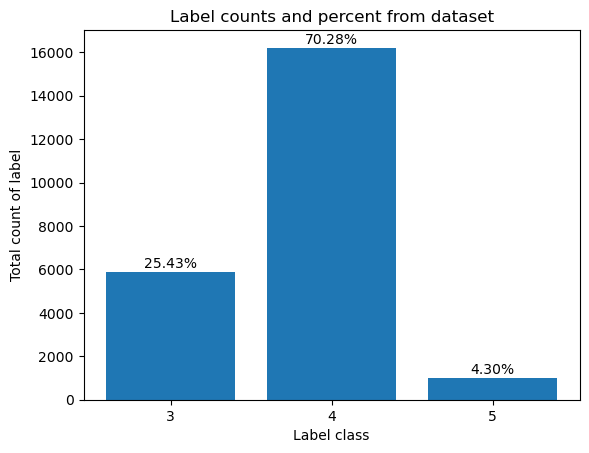

In [19]:
label = ["3", "4", "5"]
counts = [5864, 16208, 991]

total = sum(counts)
percentages = [(count / total) * 100 for count in counts]
plt.bar(label, counts)

# Add labels and title
plt.xlabel('Label class')
plt.ylabel('Total count of label')
plt.title('Label counts and percent from dataset')

# Display the percentage above each bar
for i, count in enumerate(counts):
    plt.text(i, count + 55, f'{percentages[i]:.2f}%', ha='center', va='bottom')

# Show the plot
plt.show()

In [25]:
clf = svm.SVC()
clf.fit(X_train, y_train,)

predictions = clf.predict(X_test)
predictions

array([4., 4., 4., ..., 4., 4., 4.])

In [29]:
testing_data = pd.read_csv(r"book_rating_test.csv", index_col = False, delimiter = ',', header=0)
testing_data = testing_data.select_dtypes(include="number")
data = pd.concat([testing_data, authors_d2v_test, desc_d2v_test, name_d2v_test], axis=1)
# Remove the first column id
data = data.iloc[:, 1:]

In [31]:
predictions_np = clf.predict(data)

predictions = pd.DataFrame(predictions_np)

predictions.index = np.arange(1, len(predictions)+1)
predictions.to_csv("predictions_svm.csv", header=["rating_label"], index_label="id")
predictions

,0
1,4.0
2,4.0
3,4.0
4,4.0
5,4.0
...,...
5762,4.0
5763,4.0
5764,4.0
5765,4.0


In [39]:
import random
index1 = random.randint(1, 5766)
index2 = random.randint(1, 5766)
index3 = random.randint(1, 5766)
index4 = random.randint(1, 5766)

# Update the values at the randomly selected indices
predictions.at[index1, 0] = 3.0
predictions.at[index2, 0] = 3.0
predictions.at[index3, 0] = 3.0
predictions.at[index4, 0] = 5.0

# predictions.to_csv("predictions_svm.csv", header=["rating_label"], index_label="id")
predictions.to_csv("asjifoasifjasof.csv", header=["rating_label"], index_label="id")